### Question 1:

<b> Prove that the Kullback-Leibler divergence for two normal distributions: $\mathcal{N}(\mu,\sigma)$ and $\mathcal{N}(0,1)$ is equal to: </b>

$$d_{KL}(\mathcal{N}(\mu,\sigma)||\mathcal{N}(0,1)) = \frac{1}{2}(\sigma^2 + \mu^2  - 1 - 2\log\sigma) $$ 
<b>(5 points)</b>

KL divergence measures how much one probability distribution 𝑃 differs from another distribution 𝑄. Intuitively, it answers the question: "How much extra information is needed to describe 𝑃 using 𝑄?"

The KL formula is: 
$$d_{KL}(\mathcal{P}||\mathcal{Q}) = \int P(x)\log\frac{P(x)}{Q(x)}dx $$

The KL formula is used to compared how the two distributions behave at every point of X

Formula $ \log\frac{P(x)}{Q(x)} $ measure the likelihood, if P(x) and Q(x) are similar, the ratio will close to 1 and log it will close to 0. If not the ratio becomes large (different than 0)

The variance $ \sigma^2 $ tells us how wide or narrow the bell curve of P(x) is. If $\sigma <>  1$ P(x) is either more spread out or more concentrated than Q(x), contributing to the difference.
This leads to terms like $\log\sigma$ (from normalization) and $\sigma^2$ (from the curve's shape).

The mean $\mu$ describes how shifted P(x) is compared to Q(x).
If $\mu <> 0$ P(x) is centered at a different location than Q(x).
This adds terms involving $\mu^2$, reflecting the squared distance between the means.

When we integrate over all , the result combines the contributions of  and  The final KL divergence formula is: $$ D_{KL} = \frac{1}{2}(\sigma^2 + \mu^2 - 1 - 2\log\sigma)$$
Explanation of Terms:\
$\sigma^2$ : The difference in the "spread" of the distributions.\
$\mu^2$ : The squared difference between the means.\
$-1$ : A normalization adjustment.\
$-2\log\sigma$ : The log difference of the standard deviation.

### Question 2:

<b> Show that the backpropagation algorithm is correctly deriving the error on every neuron in the network </b> <b> (5 points) </b>

First, we need to understand about Backpropagation algorithm, the Backpropagation algorithm can be understood is the method used to train neural networks. Its main job is to compute the error (or how "off" the prediction is) for every neuron in the network and update the weights to make the network's predictions better.

The algorithm is designed to ensure that every neuron is updated based on its actual role in the final output. The backpropagation algorithm is built on the chain rule of calculus, which guarantees that the error is accurately distributed across all neurons. Each neuron is updated based on Its contribution to the error and The strength of the connection (weight) to the next layer. This ensures that every neuron gets the "correct error" for the overall error

For example: If the output is wrong, the Backpropagation algorithm will start checking form the output, work backward, figuring out which neurons are causing the problem. Fix each neurons based on how much it contributes to the output

### Question 3:

<b> During the lecture we discuss dual numbers. Namely, numbers of the form: $z = a + \epsilon b$, where $a,b \in \mathbb{R}$ and  $\epsilon^2 = 0$. For every polynomial: $f(x) = a_0 + a_1x + a_2x^2 + \dots + a_nx^n$ a value for dual number $z$ is equal to: $f(z) = f(a) + bf'(a)\epsilon$. Show that it is indeed true </b> <b>(3 points)</b>. 

So the dual numbers are numbers of the formm: $z = a + \epsilon b$ where $a,b \in \mathbb{R}$ and  $\epsilon^2 = 0$. 
We plug $z = a + \epsilon b$ to $f(x)$ and we will receive: $$f(x) = a_0 + a_1(a + b\epsilon) + a_2(a + b\epsilon)^2 + \dots + a_n(a + b\epsilon)^n$$

Because $\epsilon^2 = 0$ so when we expand all the power we will receive: \
$(a + b\epsilon) = a_1(a + b\epsilon)$ \
$(a + b\epsilon)^2 = a^2 + 2ab\epsilon + (b\epsilon)^2 = a^2 + 2ab\epsilon$\
$(a + b\epsilon)^k = a^k + k a^{k-1} b\epsilon $

So we can conclude For every polynomial: $f(x) = a_0 + a_1x + a_2x^2 + \dots + a_nx^n$ a value for dual number $z$ is equal to: $f(z) = f(a) + bf'(a)\epsilon$

### Question 4:

<b> Tune the hyperparameters of the multi-layer perceptron presented during the lecture. Try to find a network with an accuracy exceeding 95% </b> <b>(7 points)</b>.

In [24]:
using Flux, Statistics
using Base.Iterators: repeated
using MLDatasets: MNIST, convert2image
using Images

In [25]:
train_set = MNIST(:train)

dataset MNIST:
  metadata  =>    Dict{String, Any} with 3 entries
  split     =>    :train
  features  =>    28×28×60000 Array{Float32, 3}
  targets   =>    60000-element Vector{Int64}

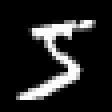

In [26]:
convert2image(MNIST,train_set.features)[:,:,1]

In [27]:
X = reshape(float.(train_set.features),size(train_set.features,1) * size(train_set.features,2),
    size(train_set.features,3))

784×60000 Matrix{Float32}:
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 ⋮                        ⋮              ⋱            ⋮                   
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 

In [28]:
Y = Flux.onehotbatch(train_set.targets, 0:9) 

10×60000 OneHotMatrix(::Vector{UInt32}) with eltype Bool:
 ⋅  1  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  …  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅
 ⋅  ⋅  ⋅  1  ⋅  ⋅  1  ⋅  1  ⋅  ⋅  ⋅  ⋅     ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  1  ⋅  ⋅  ⋅  ⋅  ⋅
 ⋅  ⋅  ⋅  ⋅  ⋅  1  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅     ⋅  ⋅  ⋅  1  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅
 ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  1  ⋅  ⋅  1  ⋅  1     ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  1  ⋅  ⋅  ⋅
 ⋅  ⋅  1  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  1  ⋅  ⋅  ⋅     ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅
 1  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  1  ⋅  …  ⋅  ⋅  ⋅  ⋅  ⋅  1  ⋅  ⋅  ⋅  1  ⋅  ⋅
 ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅     ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  1  ⋅
 ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅     1  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅
 ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅     ⋅  1  ⋅  ⋅  ⋅  ⋅  ⋅  1  ⋅  ⋅  ⋅  1
 ⋅  ⋅  ⋅  ⋅  1  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅     ⋅  ⋅  1  ⋅  1  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅

In [29]:
test_set = MNIST(:test)

#reshape data
tX = reshape(float.(test_set.features),size(train_set.features,1) * size(train_set.features,2) ,
    size(test_set.features,3))

# One-hot-encode the labels
tY = Flux.onehotbatch(test_set.targets, 0:9);

In [30]:
batch_size = 256

loader = Flux.DataLoader((X, Y), batchsize=batch_size, shuffle=true);

In [31]:
m = Chain(
  Dense(28^2 => 128, relu),
  Dropout(0.2),
  Dense(128 => 64, relu),
  Dropout(0.2),
  Dense(64 => 10),
  softmax) 

Chain(
  Dense(784 => 128, relu),              # 100_480 parameters
  Dropout(0.2),
  Dense(128 => 64, relu),               # 8_256 parameters
  Dropout(0.2),
  Dense(64 => 10),                      # 650 parameters
  NNlib.softmax,
)                   # Total: 6 arrays, 109_386 parameters, 427.641 KiB.

In [32]:
loss(m, x, y) = Flux.crossentropy(m(x), y)

accuracy(m, x, y) = mean(Flux.onecold(m(x)) .== Flux.onecold(y))

evalcb = () -> @show(loss(X, Y))
            
opt_state = Flux.setup(Adam(), m)

accuracy(m, X, Y)

0.09918333333333333

In [33]:
for epoch in 1:5
    Flux.train!(loss, m, loader, opt_state)
    @info "Epoch $epoch accuracy = $(accuracy(m, tX, tY))"
end

┌ Info: Epoch 1 accuracy = 0.9362
└ @ Main /home/cuongvosgh/Deep_learning/jl_notebook_cell_df34fa98e69747e1a8f8a730347b8e2f_X40sdnNjb2RlLXJlbW90ZQ==.jl:3
┌ Info: Epoch 2 accuracy = 0.9538
└ @ Main /home/cuongvosgh/Deep_learning/jl_notebook_cell_df34fa98e69747e1a8f8a730347b8e2f_X40sdnNjb2RlLXJlbW90ZQ==.jl:3
┌ Info: Epoch 3 accuracy = 0.9638
└ @ Main /home/cuongvosgh/Deep_learning/jl_notebook_cell_df34fa98e69747e1a8f8a730347b8e2f_X40sdnNjb2RlLXJlbW90ZQ==.jl:3
┌ Info: Epoch 4 accuracy = 0.9684
└ @ Main /home/cuongvosgh/Deep_learning/jl_notebook_cell_df34fa98e69747e1a8f8a730347b8e2f_X40sdnNjb2RlLXJlbW90ZQ==.jl:3
┌ Info: Epoch 5 accuracy = 0.9713
└ @ Main /home/cuongvosgh/Deep_learning/jl_notebook_cell_df34fa98e69747e1a8f8a730347b8e2f_X40sdnNjb2RlLXJlbW90ZQ==.jl:3


In [34]:
using BSON

In [35]:
s = Flux.state(m)
BSON.@save "MNIST_extrahomework.bson" s

Updated point:
- Increase layer of model 
- Add dropout to avoid overfitting


In [36]:
m = Chain(
  Dense(28^2 => 128, relu),
  Dropout(0.2),
  Dense(128 => 64, relu),
  Dropout(0.2),
  Dense(64 => 10),
  softmax) 

BSON.@load "MNIST_extrahomework.bson" s

Flux.loadmodel!(m, s)

accuracy(m, tX, tY)

0.9713

<b> Please find file "MNIST_extrahomework.bson" for model detail. </b>

### Question 5:

<b> Change the loss function of the generator network presented in the class. Use the maximum likelihood game instead. How does the change affect the results? </b> <b>(8 points)</b>

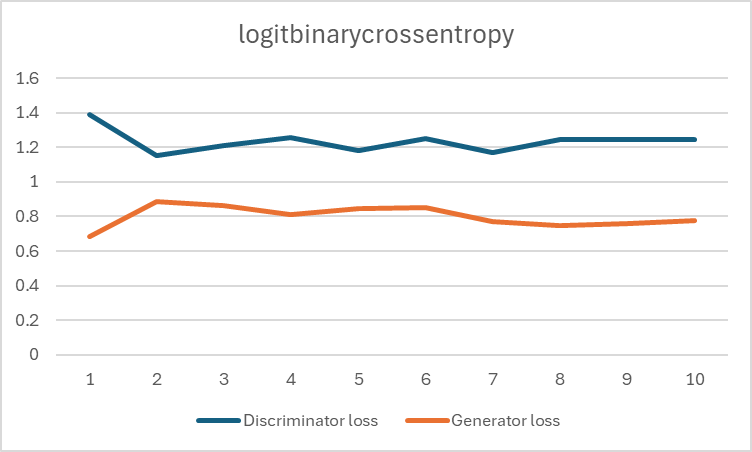

In [1]:
using Flux, MLDatasets
using Flux: mse, throttle, params, onehotbatch
using Base.Iterators: partition
using Printf, BSON, JLD2, LinearAlgebra
using Zygote
using Images
using CUDA
using Statistics

In [2]:
use_cuda = true

true

In [3]:
if use_cuda && CUDA.functional()
    device = gpu
    @info "Training on GPU"
else
    device = cpu
    @info "Training on CPU"
end

┌ Info: Training on GPU
└ @ Main /home/cuongvosgh/Deep_learning/jl_notebook_cell_df34fa98e69747e1a8f8a730347b8e2f_X51sdnNjb2RlLXJlbW90ZQ==.jl:3


In [4]:
batch_size = 128
latent_dim = 100

100

In [5]:
train_set = MNIST(:train)
Y = onehotbatch(train_set.targets, 0:9)   |> device;
imgs = reshape(@.(2f0 * train_set.features - 1f0), 28, 28, 1, :);
dataset = [(imgs[:,:,:,i], Y[:,i]) for i in partition(1:size(imgs,4), batch_size)] |> device;

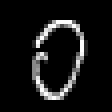

In [6]:
Gray.(dropdims((cpu(dataset[3][1][:,:,:,5]).+1.f0) ./ 2.f0; dims = 3))

In [7]:
d_labels = Chain(Dense(10,28^2), x-> reshape(x, 28, 28, 1, size(x, 2)))  |> device
d_common = Chain(Conv((3,3), 2=>128, pad=(1,1), stride=(2,2)),
                  x-> leakyrelu.(x, 0.2f0),
                  Dropout(0.4),
                  Conv((3,3), 128=>128, pad=(1,1), stride=(2,2), leakyrelu),
                  x-> leakyrelu.(x, 0.2f0),
                  x-> reshape(x, :, size(x, 4)),
                  Dropout(0.4),
                  Dense(6272, 1)) |> device

Chain(
  Conv((3, 3), 2 => 128, pad=1, stride=2),  # 2_432 parameters
  var"#15#18"(),
  Dropout(0.4),
  Conv((3, 3), 128 => 128, leakyrelu, pad=1, stride=2),  # 147_584 parameters
  var"#16#19"(),
  var"#17#20"(),
  Dropout(0.4),
  Dense(6272 => 1),                     # 6_273 parameters
)                   # Total: 6 arrays, 156_289 parameters, 1.164 KiB.

In [8]:
function discriminator(label, data)
    x = cat(d_labels(label), data, dims=3)
    return d_common(x)
end

discriminator (generic function with 1 method)

In [9]:
g_labels = Chain(Dense(10, 49), x-> reshape(x, 7 , 7 , 1 , size(x, 2))) |> device
g_latent = Chain(Dense(latent_dim, 6272), x-> leakyrelu.(x, 0.2f0), 
    x-> reshape(x, 7, 7, 128, size(x, 2))) |> device
g_common = Chain(ConvTranspose((4, 4), 129=>128; stride=2, pad=1),
            BatchNorm(128, leakyrelu),
            Dropout(0.25),
            ConvTranspose((4, 4), 128=>64; stride=2, pad=1),
            BatchNorm(64, leakyrelu),
            Conv((7, 7), 64=>1, tanh; stride=1, pad=3)) |> device

Chain(
  ConvTranspose((4, 4), 129 => 128, pad=1, stride=2),  # 264_320 parameters
  BatchNorm(128, leakyrelu),            # 256 parameters, plus 256
  Dropout(0.25),
  ConvTranspose((4, 4), 128 => 64, pad=1, stride=2),  # 131_136 parameters
  BatchNorm(64, leakyrelu),             # 128 parameters, plus 128
  Conv((7, 7), 64 => 1, tanh, pad=3),   # 3_137 parameters
)         # Total: 10 trainable arrays, 398_977 parameters,
          # plus 4 non-trainable, 384 parameters, summarysize 2.531 KiB.

In [10]:
function generator(labels, noise)
    x = cat(g_labels(labels), g_latent(noise), dims=3)
    return g_common(x)
end

generator (generic function with 1 method)

<b> Orginal discriminator_loss and generator_loss function </b>

In [23]:
function discriminator_loss(real_output, fake_output)
    real_loss = Flux.Losses.logitbinarycrossentropy(real_output, 1f0)
    fake_loss = Flux.Losses.logitbinarycrossentropy(fake_output, 0f0)
    return (real_loss + fake_loss)
end

generator_loss(fake_output) = Flux.Losses.logitbinarycrossentropy(fake_output, 1f0)

generator_loss (generic function with 1 method)

<b> discriminator_loss and generator_loss function using MLE</b>

In [11]:
function discriminator_loss(real_output, fake_output)
    real_loss = Flux.Losses.binarycrossentropy(real_output, 1f0, agg=mean, eps=1f-8)
    fake_loss = Flux.Losses.binarycrossentropy(fake_output, 0f0, agg=mean, eps=1f-8)
    return (real_loss + fake_loss)
end

generator_loss(fake_output) = Flux.Losses.binarycrossentropy(fake_output, 1f0, agg=mean, eps=1f-8)

generator_loss (generic function with 1 method)

<b> Create discriminator_loss and generator_loss function using MLE</b> -- without library

In [ ]:
function discriminator_loss(real_output, fake_output)
    real_loss = -log.(real_output)
    fake_loss = -log.(1f0 .- fake_output)
    return mean(real_loss) + mean(fake_loss)
end

generator_loss(fake_output) = mean(-log.(fake_output))

In [12]:
function sample(noise, labels)
    @eval NNlib.within_gradient(generator) = false
    imgs = @.(generator(device(labels), device(noise)))
    @eval NNlib.within_gradient(generator) = true
    imgs = cpu(imgs)
    Gray.((transpose(dropdims(reduce(vcat, reduce.(hcat, partition(imgs, 4))); dims=(3, 4)))
            .+ 1f0)./2.f0)
end

sample (generic function with 1 method)

In [13]:
opt_dscr = Adam(0.0002, (0.5, 0.99))
opt_gen = Adam(0.0002, (0.5, 0.99))

Adam(0.0002, (0.5, 0.99), 1.0e-8, IdDict{Any, Any}())

In [14]:
function train_discriminator(fake_data, fake_labels, original_data, labels, opt_discr)
    ps = params(d_labels, d_common)
    loss, back = Zygote.pullback(ps) do
        discriminator_loss(discriminator(labels, original_data), discriminator(fake_labels, fake_data))
    end
    grads = back(1f0)
    Flux.Optimise.update!(opt_discr, ps, grads)
    return loss
end

Zygote.@nograd train_discriminator

┌ Info: Beginning training loop...
└ @ Main /home/cuongvosgh/Deep_learning/jl_notebook_cell_df34fa98e69747e1a8f8a730347b8e2f_Y102sdnNjb2RlLXJlbW90ZQ==.jl:3
┌ Info: Epoch 1
└ @ Main /home/cuongvosgh/Deep_learning/jl_notebook_cell_df34fa98e69747e1a8f8a730347b8e2f_Y102sdnNjb2RlLXJlbW90ZQ==.jl:6
┌ Info: Epoch: 1, Discriminator loss = NaN, Generator loss = NaN
└ @ Main /home/cuongvosgh/Deep_learning/jl_notebook_cell_df34fa98e69747e1a8f8a730347b8e2f_Y102sdnNjb2RlLXJlbW90ZQ==.jl:21
┌ Info: Epoch 2
└ @ Main /home/cuongvosgh/Deep_learning/jl_notebook_cell_df34fa98e69747e1a8f8a730347b8e2f_Y102sdnNjb2RlLXJlbW90ZQ==.jl:6
┌ Info: Epoch: 2, Discriminator loss = NaN, Generator loss = NaN
└ @ Main /home/cuongvosgh/Deep_learning/jl_notebook_cell_df34fa98e69747e1a8f8a730347b8e2f_Y102sdnNjb2RlLXJlbW90ZQ==.jl:21
┌ Info: Epoch 3
└ @ Main /home/cuongvosgh/Deep_learning/jl_notebook_cell_df34fa98e69747e1a8f8a730347b8e2f_Y102sdnNjb2RlLXJlbW90ZQ==.jl:6
┌ Info: Epoch: 3, Discriminator loss = NaN, Generator loss 

4×4 Matrix{Int64}:
 2  9  8  6
 5  2  2  8
 0  2  2  6
 5  6  8  2

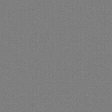

4×4 Matrix{Int64}:
 2  9  8  6
 5  2  2  8
 0  2  2  6
 5  6  8  2

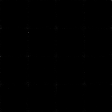

4×4 Matrix{Int64}:
 2  9  8  6
 5  2  2  8
 0  2  2  6
 5  6  8  2

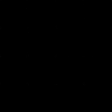

4×4 Matrix{Int64}:
 2  9  8  6
 5  2  2  8
 0  2  2  6
 5  6  8  2

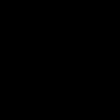

4×4 Matrix{Int64}:
 2  9  8  6
 5  2  2  8
 0  2  2  6
 5  6  8  2

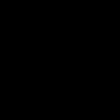

4×4 Matrix{Int64}:
 2  9  8  6
 5  2  2  8
 0  2  2  6
 5  6  8  2

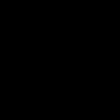

4×4 Matrix{Int64}:
 2  9  8  6
 5  2  2  8
 0  2  2  6
 5  6  8  2

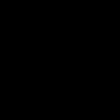

4×4 Matrix{Int64}:
 2  9  8  6
 5  2  2  8
 0  2  2  6
 5  6  8  2

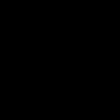

4×4 Matrix{Int64}:
 2  9  8  6
 5  2  2  8
 0  2  2  6
 5  6  8  2

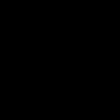

4×4 Matrix{Int64}:
 2  9  8  6
 5  2  2  8
 0  2  2  6
 5  6  8  2

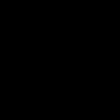

In [15]:
noise = [randn(Float32,latent_dim, 1) for i=1:16] 
labels = [float32.(Flux.onehotbatch(rand(0:9, 1), 0:9)) for i =1:16];
@info("Beginning training loop...")
for epoch = 1:10
    d_loss,g_loss = Inf, Inf
    @info "Epoch $epoch"
    display(reduce(vcat, reduce.(hcat, partition(Flux.onecold.(labels), 4))) .- 1)
    display(sample(noise,labels))
    for (x, labels) in dataset
        latents = randn(Float32,(latent_dim, batch_size)) |> device        
        y = Float32.(Flux.onehotbatch(rand(0:9, batch_size), 0:9)) |> device        
        ps = params(g_labels, g_latent, g_common)
        g_loss, back = Zygote.pullback(ps) do                       
            fake = generator(y, latents)
            d_loss = train_discriminator(fake, y, x, labels, opt_dscr)          
            generator_loss(discriminator(y, fake))             
        end
        grads = back(1f0)
        Flux.Optimise.update!(opt_gen, ps, grads)
    end
    @info("Epoch: $epoch, Discriminator loss = $d_loss, Generator loss = $g_loss")
    model_params = cpu(Flux.state((d_labels, d_common, g_labels, g_latent, g_common)))
    BSON.@save "CDGAN_MNIST_extrahomework.bson" model_params 
end

### Question 6:

<b> Instead of assuming prior Gaussian distribution on the latent variables, use the Binomial (Bernoulli) distribution. Retrain the model, how does the change impact the results? </b> <b>(12 points)</b>